<h2>Total Number of Colors Lego Pieces Have</h2>

In [1]:
from matplotlib.pyplot import plot, legend, figure, bar
import pandas as pd
pd.options.display.float_format='{:,.2f}'.format

color_df = pd.read_csv('colors.csv')
unique_color_df = color_df['name'].nunique()
unique_color_df

135

<h2>Number of Transparent Lego Pieces Versus the Number of Opaque Lego Pieces Plot</h2>

(0.0, 150.0)

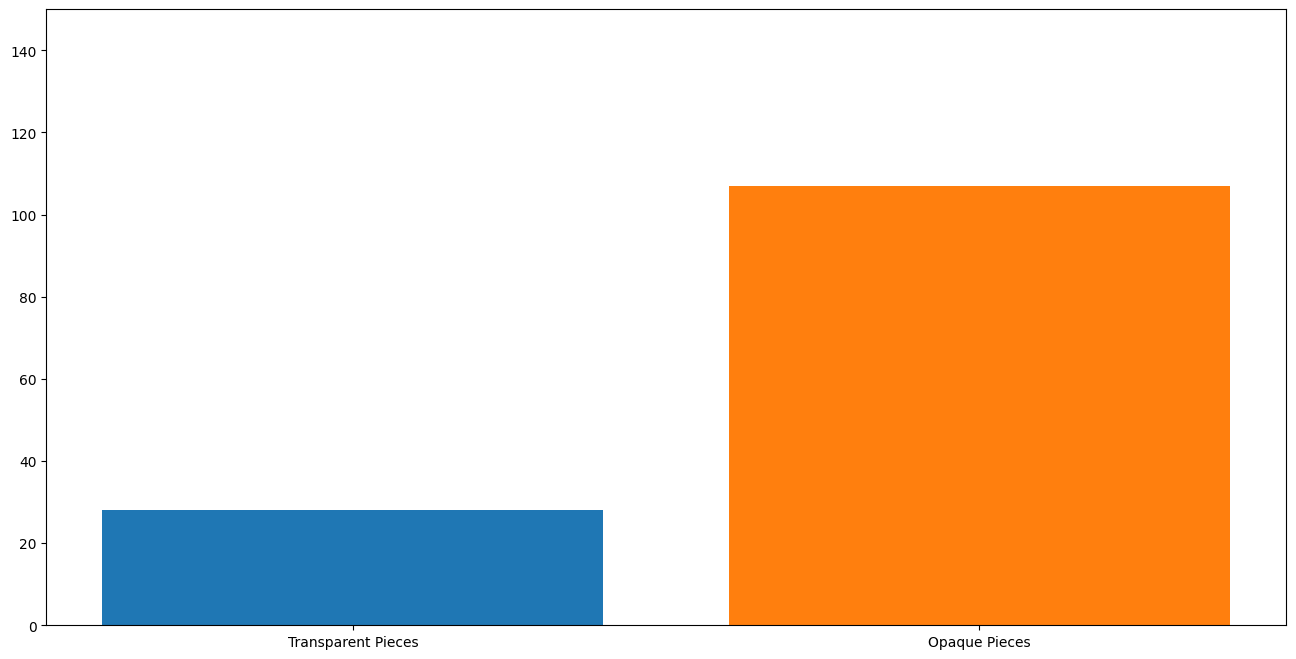

In [17]:
from matplotlib.pyplot import plot, legend, figure, bar, ylim, yticks
import pandas as pd
pd.options.display.float_format='{:,.2f}'.format

figure(figsize=(16,8))
transparent = color_df[color_df.is_trans == 't'].groupby('is_trans').count()
opaque = color_df[color_df.is_trans == 'f'].groupby('is_trans').count()
num_transparent = transparent.name
num_opaque = opaque.name
bar("Transparent Pieces", height=num_transparent)
bar("Opaque Pieces", height=num_opaque)
ylim(0, 150)


<h2>Number of Transparent Lego Pieces vs.
Number of Opaque Lego Pieces Table</h2>


In [2]:
t_pieces = color_df.groupby('is_trans').count()
t_pieces

,id,name,rgb
is_trans,,,
f,107,107,107
t,28,28,28


<h2>Understanding LEGO Themes vs. LEGO Sets</h2>
<img src="https://i.imgur.com/aKcwkSx.png"/>
<em><p style="text-align: center;">A LEGO set is a particular box of LEGO or product while a single theme has many different sets.</p></em>
<img src="https://i.imgur.com/whB1olq.png"/>
<p>The <code>sets.csv</code> data contains a list of sets over the years and the number of parts that each of these sets contained.</p>

<h2>First 5 LEGO Sets in Data Frame</h2>


In [4]:
df = pd.read_csv('sets.csv')
sets_df = df.dropna()
sets_df.head()

,set_num,name,year,theme_id,num_parts
0,001-1,Gears,1965,1,43
1,0011-2,Town Mini-Figures,1978,84,12
2,0011-3,Castle 2 for 1 Bonus Offer,1987,199,0
3,0012-1,Space Mini-Figures,1979,143,12
4,0013-1,Space Mini-Figures,1979,143,12


<h2>Last 5 LEGO Sets in Data Frame</h2>

In [ ]:
print(sets_df.tail())

           set_num                                 name  year  theme_id  \
15705      wwgp1-1  Wild West Limited Edition Gift Pack  1996       476   
15706   XMASTREE-1                       Christmas Tree  2019       410   
15707      XWING-1                  Mini X-Wing Fighter  2019       158   
15708      XWING-2                    X-Wing Trench Run  2019       158   
15709  YODACHRON-1      Yoda Chronicles Promotional Set  2013       158   

       num_parts  
15705          0  
15706         26  
15707         60  
15708         52  
15709        413  


<h2>First LEGO Set Ever Released</h2>

In [5]:
first_set = sets_df.sort_values('year')[0:1]
first_set

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142


<h2>First Ever LEGO Sets in Their First Year</h2>

In [6]:
first_year = sets_df.sort_values('year').min()['year']
first_sets = sets_df[sets_df.year == first_year]
first_sets

,set_num,name,year,theme_id,num_parts
9521,700.1-1,Extra-Large Gift Set (ABB),1949,365,142
9534,700.2-1,Large Gift Set (ABB),1949,365,178
9539,700.3-1,Medium Gift Set (ABB),1949,365,142
9544,700.A-1,Small Brick Set (ABB),1949,371,24
9545,700.B-1,Small Doors and Windows Set (ABB),1949,371,12


<h2>Number of Sets LEGO Released Their First Year</h2>

In [7]:
first_sets.count()['set_num']

5

<h2>Top 5 LEGOs With the Highest Amount of Pieces</h2>

In [8]:
sorted_by_parts = sets_df.sort_values('num_parts', ascending=False)
sorted_by_parts.head()

,set_num,name,year,theme_id,num_parts
15004,BIGBOX-1,The Ultimate Battle for Chima,2015,571,9987
11183,75192-1,UCS Millennium Falcon,2017,171,7541
10551,71043-1,Hogwarts Castle,2018,246,6020
295,10256-1,Taj Mahal,2017,673,5923
221,10189-1,Taj Mahal,2008,673,5922


<h2>Number of Sets Released by Year</h2>

In [16]:
num_years = sets_df['year'].nunique()
sorted_by_year = sets_df.sort_values('year')
sets_by_year = sorted_by_year.groupby('year')['set_num'].count()
sets_by_year = sets_by_year[0:num_years - 2]
sets_by_year

year
1949      5
1950      6
1953      4
1954     14
1955     28
       ... 
2015    774
2016    757
2017    786
2018    816
2019    840
Name: set_num, Length: 69, dtype: int64

<h2>Line Chart Representation of Sets Released by Year</h2>

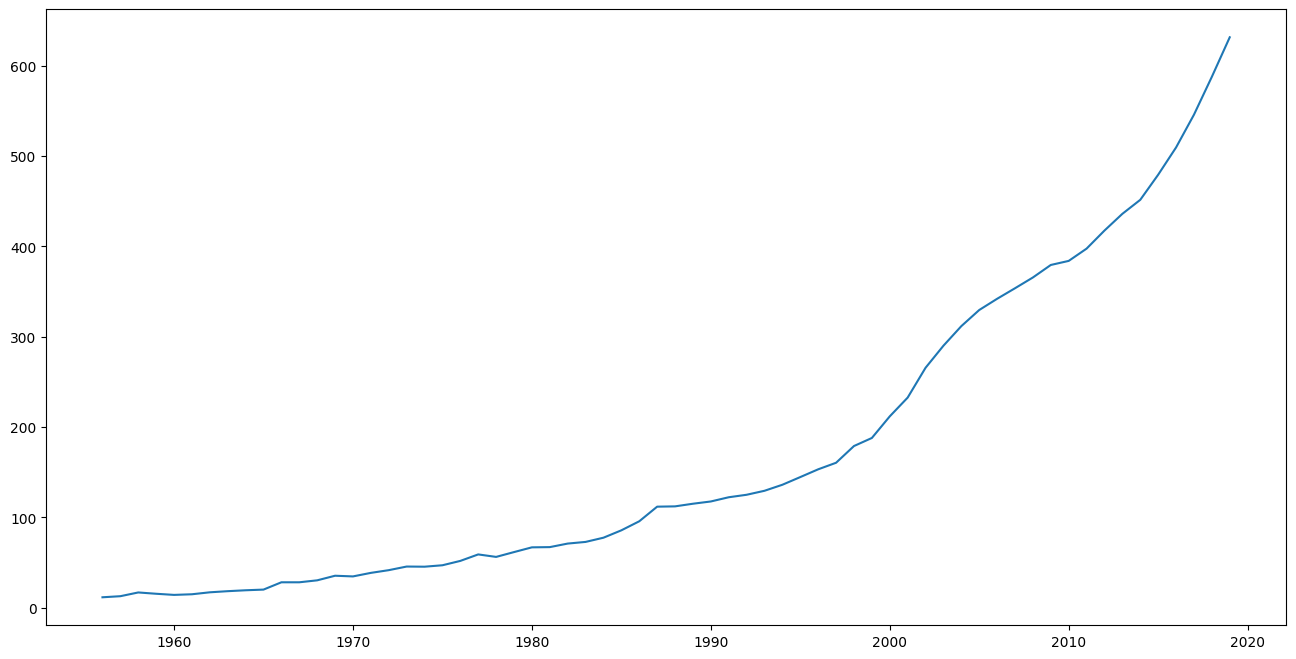

In [18]:
figure(figsize=(16,8))
plot(sets_by_year.rolling(12, min_periods=6).mean())

<h2>Number of Themes Released By Year</h2>

In [11]:
themes_by_year = sorted_by_year.groupby('year')['theme_id'].nunique()[0:num_years - 2]
themes_by_year

year
1949     2
1950     1
1953     2
1954     2
1955     4
        ..
2015    98
2016    92
2017    89
2018    93
2019    78
Name: theme_id, Length: 69, dtype: int64

<h2>Number of Themes and Sets Released by Year Graph</h2>

Text(0, 0.5, 'Number of Sets')

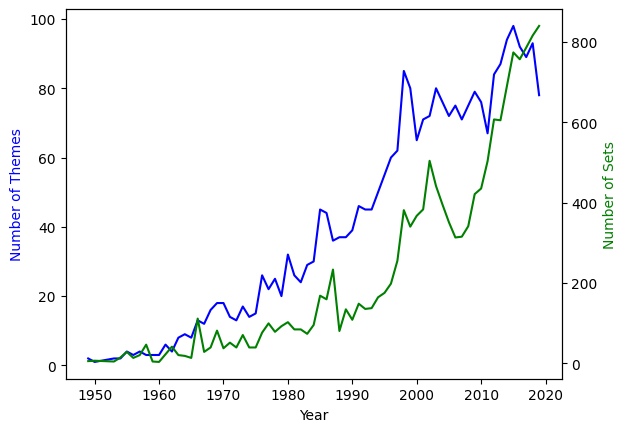

<Figure size 1600x800 with 0 Axes>

In [19]:
from matplotlib.pyplot import gca

num_sets = sorted_by_year.groupby('year')['set_num'].nunique()
num_sets = num_sets[0:num_years - 2]

ax1 = gca()
ax2 = ax1.twinx()

figure(figsize=(16,8))
ax1.plot(themes_by_year, color='b')
ax2.plot(num_sets, color='g')

ax1.set_xlabel('Year')
ax1.set_ylabel('Number of Themes', color='blue')
ax2.set_ylabel('Number of Sets', color='green')

<h2>Average Number of LEGO Parts 1954 vs. 2017 Graph</h2>

([<matplotlib.axis.XTick at 0x7d7147bc6aa0>,
 [Text(1954, 0, '1954'), Text(2017, 0, '2017')])

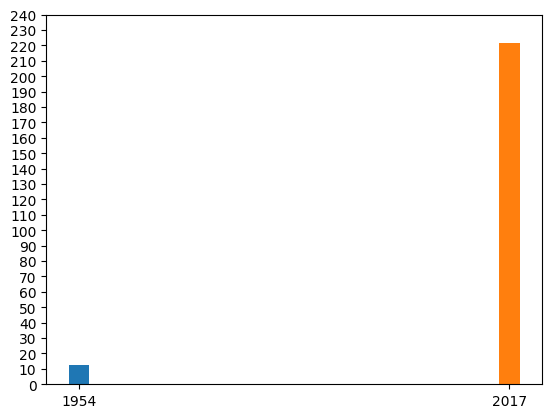

In [20]:
from matplotlib.pyplot import xticks
import numpy as np
avg_parts = sorted_by_year.groupby('year').agg({'num_parts': 'mean'})[0:num_years - 2]
bar(1954, height=avg_parts.loc[1954], width=3)
bar(2017, height=avg_parts.loc[2017], width=3)
yticks(np.arange(0, avg_parts['num_parts'].max(), step=10))
xticks([1954, 2017])


<h2>Average Number of LEGO Pieces per Set by Year</h2>

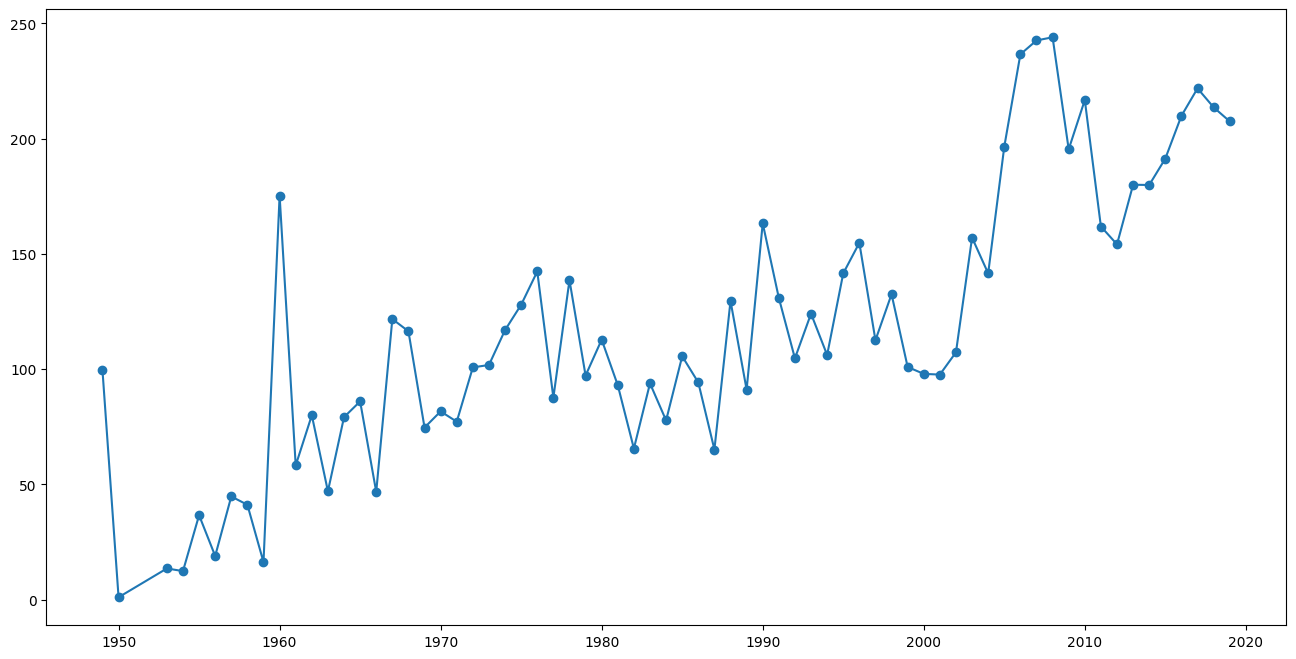

In [21]:
from matplotlib.pyplot import scatter
figure(figsize=(16, 8))

years = sorted_by_year['year'].unique()[0:num_years - 2]
scatter(x=years, y=avg_parts['num_parts'])
plot(years, avg_parts['num_parts'])

<h2>Database Schema</h2>
<img src="https://i.imgur.com/Sg4lcjx.png">

<h2>Theme With the Highest Number of Sets</h2>

In [22]:
themes_df = pd.read_csv('themes.csv')
sets_per_theme = sorted_by_year.groupby('theme_id')['set_num'].count()
max_num_sets = sets_per_theme.max()
max_index = sets_per_theme.idxmax()
top_theme = themes_df[themes_df.id == max_index]['name']
top_theme

150    Star Wars
Name: name, dtype: object

<h2>Total Number of LEGO Star Wars Sets</h2>

In [14]:
merged_data = sets_df.merge(themes_df, left_on=sets_df.theme_id, right_on=themes_df.id)
star_wars_data = merged_data[merged_data.name_y == 'Star Wars']
star_wars_sets = star_wars_data['set_num'].nunique()
star_wars_sets

776